# Neural Network on Parkinsons Disease

[link kaggle](https://www.kaggle.com/code/alirafazi/neural-network-on-parkinsons-disease/input)

> Other Links:
- https://iaexpert.academy/2025/05/28/analise-voz-ia-nova-esperanca-diagnostico-parkinson/
- https://www.nature.com/articles/s41598-025-96575-6
- https://www.nature.com/articles/s41598-023-47568-w#ref-CR16
-

## Input Data

### About this file
This dataset contains clinical and acoustic measurements related to Parkinson's disease, focusing on vocal biomarkers. It includes key features such as jitter, shimmer, and harmonics-to-noise ratios, which are used to identify patterns in voice that may indicate the presence of Parkinson’s disease. The dataset is structured with both patient identifiers and acoustic features, making it ideal for developing machine learning models for early detection, disease monitoring, and treatment planning.

### Key features include:
- Patient IDs and status (diagnosed or not).
- Acoustic features such as MDVP, jitter, shimmer, and noise ratios.
- Nonlinear dynamical voice analysis metrics like RPDE and DFA.
T
his dataset is a crucial resource for researchers and healthcare professionals interested in applying AI models to Parkinson's disease detection and progression analysis.

In [58]:
!pip uninstall tensorflow
!pip uninstall tensorflow-gpu
!pip cache purge
!pip install tensorflow

In [110]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

In [111]:
import warnings
warnings.filterwarnings("ignore" ,category=FutureWarning)

## Step 1 | Importing Dataset

In [112]:
df=pd.read_csv("dataset.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [113]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Step 2 | Data Information

In [114]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1195 non-null   object 
 1   MDVP:Fo(Hz)       1195 non-null   float64
 2   MDVP:Fhi(Hz)      1195 non-null   float64
 3   MDVP:Flo(Hz)      1195 non-null   float64
 4   MDVP:Jitter(%)    1195 non-null   float64
 5   MDVP:Jitter(Abs)  1195 non-null   float64
 6   MDVP:RAP          1195 non-null   float64
 7   MDVP:PPQ          1195 non-null   float64
 8   Jitter:DDP        1195 non-null   float64
 9   MDVP:Shimmer      1195 non-null   float64
 10  MDVP:Shimmer(dB)  1195 non-null   float64
 11  Shimmer:APQ3      1195 non-null   float64
 12  Shimmer:APQ5      1195 non-null   float64
 13  MDVP:APQ          1195 non-null   float64
 14  Shimmer:DDA       1195 non-null   float64
 15  NHR               1195 non-null   float64
 16  HNR               1195 non-null   float64


(1195, 24)

In [115]:
df_phon = df[df['name'].str.startswith('phon')]

# Separar os registros que começam com 'synth'
df_synth = df[df['name'].str.startswith('synth')]

df = df_phon.copy()

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 17  st

(195, 24)

In [119]:
df = df.drop('name', axis=1)
df['status'].value_counts()

KeyError: "['name'] not found in axis"

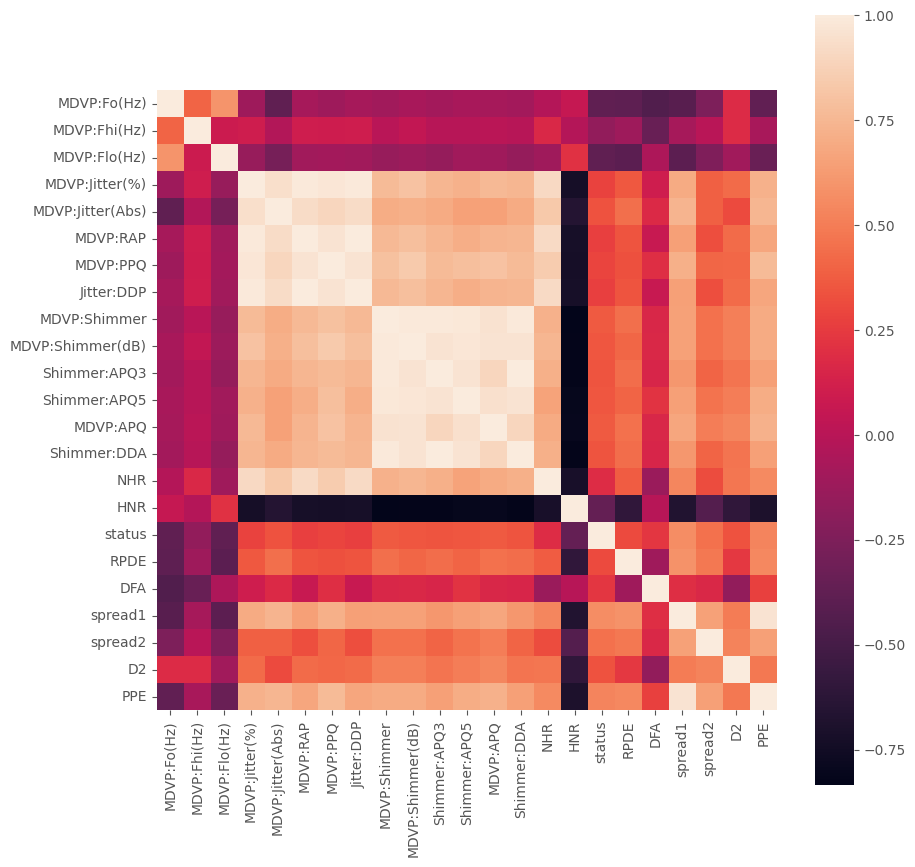

In [120]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax= 1, square=True);

## Step 3 | Data Preprocessing
### Step 3.1 | Outliers ¶

In [121]:
df.shape
df['status'].value_counts()

status
1.0    147
0.0     48
Name: count, dtype: int64

In [122]:
# Assuming df is your dataframe
threshold = 3

# Calculate Z-scores
z_scores = (df - df.mean()) / df.std()

# Create a boolean mask for non-outlier rows
mask = ~((np.abs(z_scores) > threshold).any(axis=1))

# Apply the mask to keep only non-outlier rows
df_without_outliers = df[mask]

# If you want to update the original dataframe
df = df_without_outliers.copy()

# Optionally, reset the index if needed
df.reset_index(drop=True, inplace=True)

In [123]:
df.shape

(181, 23)

### Step 3.2 | Normalization

## Step 4 | Splitting to test , validation set

In [124]:
from sklearn.model_selection import train_test_split

X = df.drop('status', axis=1)  # Features (all columns except 'Rating')
y = df['status']  # Target variable

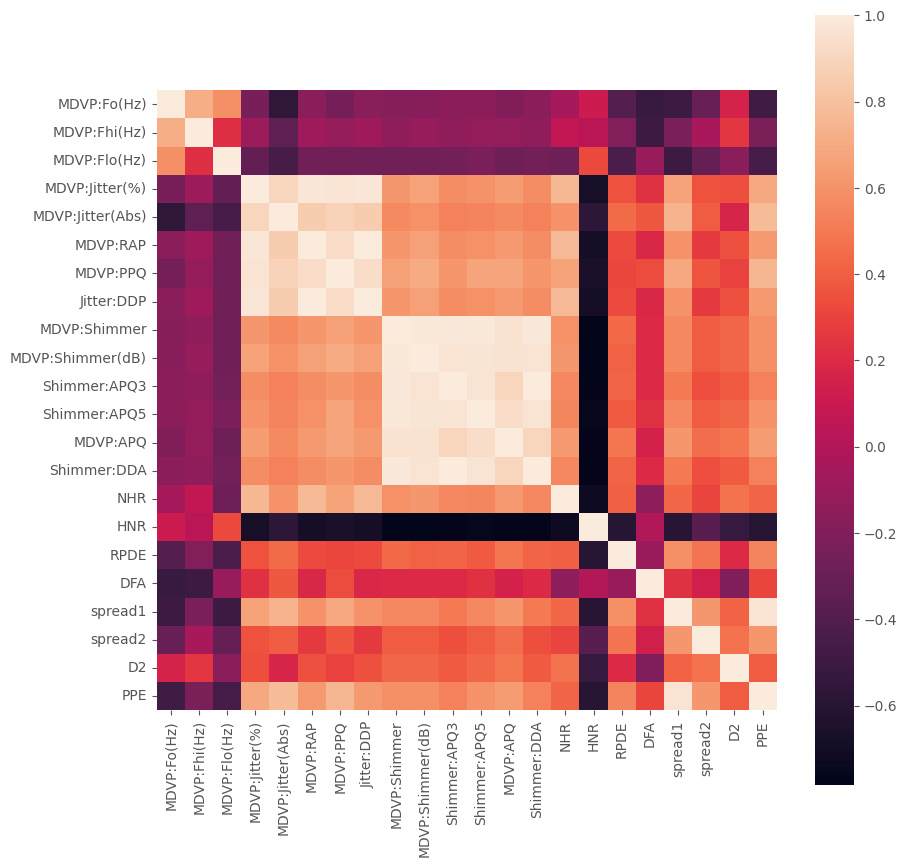

In [125]:
#correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax= 1, square=True);

In [126]:
# Calculate correlation matrix
corrmat = X.corr().abs()  # Use absolute value to get both positive and negative correlations

# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.9

# Create an upper triangle matrix to avoid checking correlations twice (i.e., A with B and B with A)
upper = X.where(np.triu(np.ones(X.shape), k=1).astype(bool))

# Find features with correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated features from the dataset
X = X.drop(columns=to_drop)

print(to_drop)

['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'D2']


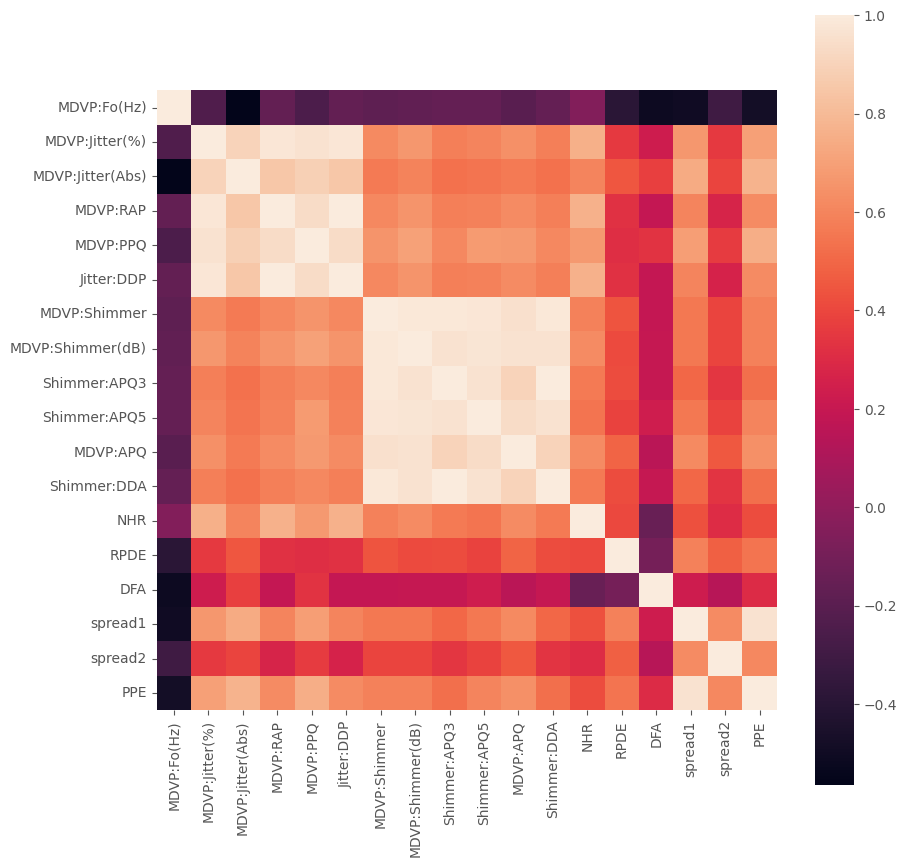

In [127]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax= 1, square=True);

In [128]:
# Split the data into training and testing sets (80% training, 20% testing in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train) , columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test) , columns = X.columns)

y_train.head()

65    0.0
67    1.0
31    0.0
12    1.0
41    1.0
Name: status, dtype: float64

In [130]:
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential

ann = Sequential()
ann.add(Dense(units=30, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

ann.add(Dense(units=64, activation='relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

# Output layer for regression (no sigmoid, use linear activation)
ann.add(Dense(units=1, activation='linear'))

# Compile the model with a loss function appropriate for regression
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


c:\Users\Workstation-Lab\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.0512 - mean_absolute_error: 1.5666 - val_loss: 1.0300 - val_mean_absolute_error: 0.9143
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.7102 - mean_absolute_error: 1.6473 - val_loss: 0.8553 - val_mean_absolute_error: 0.8149
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.9500 - mean_absolute_error: 1.5251 - val_loss: 0.6924 - val_mean_absolute_error: 0.7372
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.6849 - mean_absolute_error: 1.6070 - val_loss: 0.5671 - val_mean_absolute_error: 0.6870
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.5827 - mean_absolute_error: 1.2949 - val_loss: 0.4674 - val_mean_absolute_error: 0.6410
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8390 - mean_absolute_error: 1.3374 - val_loss: 0.3913 - val_mean_absolute_error: 0.6002
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.3100 - mean_absolute_error: 1.1424 - val_loss: 0.3350 - val_mean

In [78]:
from sklearn.metrics import mean_absolute_error

# Get model predictions
y_pred = ann.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Mean Absolute Error: 0.29467962561426936


In [84]:
y_pred = y_pred.ravel()
y_test = y_test.ravel()  
print(y_test.shape)  
print(y_pred.shape)  

print(y_pred)
print((y_test-y_pred))

(37,)
(37,)
[0.9882823  0.42663455 0.5764261  1.0317934  0.70182097 0.6977312
 0.9061498  0.6139134  0.541493   0.7822413  0.7861602  0.68987143
 0.5169996  0.8790024  0.44412363 0.73891467 0.55568385 0.7414509
 0.85106856 0.86041325 1.0758718  0.71778196 0.828198   0.54849744
 0.83805925 0.7374098  0.55550015 1.0635035  0.9430215  0.58271027
 0.5641196  0.90909994 0.8377598  0.7115789  0.91727656 0.7680679
 0.7442748 ]
[ 0.01171768 -0.42663455 -0.57642609 -0.03179336  0.29817903  0.3022688
  0.0938502   0.38608658  0.458507    0.21775872  0.21383983 -0.68987143
  0.4830004   0.12099761 -0.44412363  0.26108533 -0.55568385  0.25854909
  0.14893144  0.13958675 -0.07587183  0.28221804  0.17180198 -0.54849744
  0.16194075 -0.73740977 -0.55550015 -0.0635035   0.05697852 -0.58271027
  0.43588042  0.09090006  0.16224021  0.28842109  0.08272344  0.2319321
  0.2557252 ]


In [80]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: inf%


C:\Users\Workstation-Lab\AppData\Local\Temp\ipykernel_6004\3166206305.py:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
